In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('../data/raw/UNCLEANED_2.csv')

# List of numerical columns
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns

# Descriptive statistics
df[numerical_features].describe().transpose()

/var/folders/b_/y_jk5_7x3fvccjvy28hp6r640000gn/T/ipykernel_33174/2964418053.py:4: DtypeWarning: Columns (259,283,307) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../data/raw/UNCLEANED_2.csv')


count        mean         std        min  \
result                   13532.0    0.495270    0.499996   0.000000   
total_comp_time          13532.0  623.440955  367.403760   5.000000   
round                    13532.0    2.310893    1.018601   1.000000   
reach                    12057.0   72.139587    4.174607  58.000000   
height                   13518.0   70.426542    3.480258  60.000000   
...                          ...         ...         ...        ...   
ground_strikes_accuracy  13513.0   42.448777   40.056486   0.000000   
takedowns_def            13513.0   72.927770   35.839750   0.000000   
reach_differential       11233.0    1.001018    0.045059   0.828947   
height_differential      13485.0    1.000753    0.036673   0.835443   
age_differential         12974.0    1.010427    0.146908   0.594595   

                                25%    50%         75%          max  
result                     0.000000    0.0    1.000000     1.000000  
total_comp_time          265.000000  773.0  900.000000  2160.000000  
round                      1.000000    3.0    3.000000     5.000000  
reach                     70.000000   72.0   75.000000    84.000000  
height                    68.000000   71.0   73.000000    83.000000  
...                             ...    ...         ...          ...  
ground_strikes_accuracy    0.000000   50.0   78.947368   100.000000  
takedowns_def             50.000000  100.0  100.000000   100.000000  
reach_differential         0.972222    1.0    1.028571     1.206349  
height_differential        0.973333    1.0    1.027397     1.196970  
age_differential           0.909091    1.0    1.100000     1.681818  

[405 rows x 8 columns]

## Feature Engineering

In [2]:
# Check if 'date' is already datetime
if not pd.api.types.is_datetime64_any_dtype(df['date']):
    print('Converting date to datetime')
    df['date'] = pd.to_datetime(df['date'])

# Extract date components
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day
df['day_of_week'] = df['date'].dt.dayofweek

# Sort by fighter and date
df = df.sort_values(['fighter', 'date'])

# Calculate the difference in days
df['days_since_last_fight'] = df.groupby('fighter')['date'].diff().dt.days

Converting date to datetime


In [3]:
df['num_past_fights'] = df.groupby('fighter').cumcount()

# Calculate cumulative wins
df['cumulative_wins'] = df.groupby('fighter')['result'].cumsum() - df['result']

# Compute win-loss ratio
df['win_loss_ratio'] = df['cumulative_wins'] / df['num_past_fights']
df['win_loss_ratio'].fillna(0, inplace=True)

/var/folders/b_/y_jk5_7x3fvccjvy28hp6r640000gn/T/ipykernel_33174/141254478.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['win_loss_ratio'].fillna(0, inplace=True)


In [4]:
# Calculate BMI without adding extra columns
df['BMI'] = (df['weight'] * 0.453592) / ((df['height'] * 0.0254) ** 2)

df['physical_advantage'] = df['reach_differential'] + df['height_differential'] - df['age_differential']

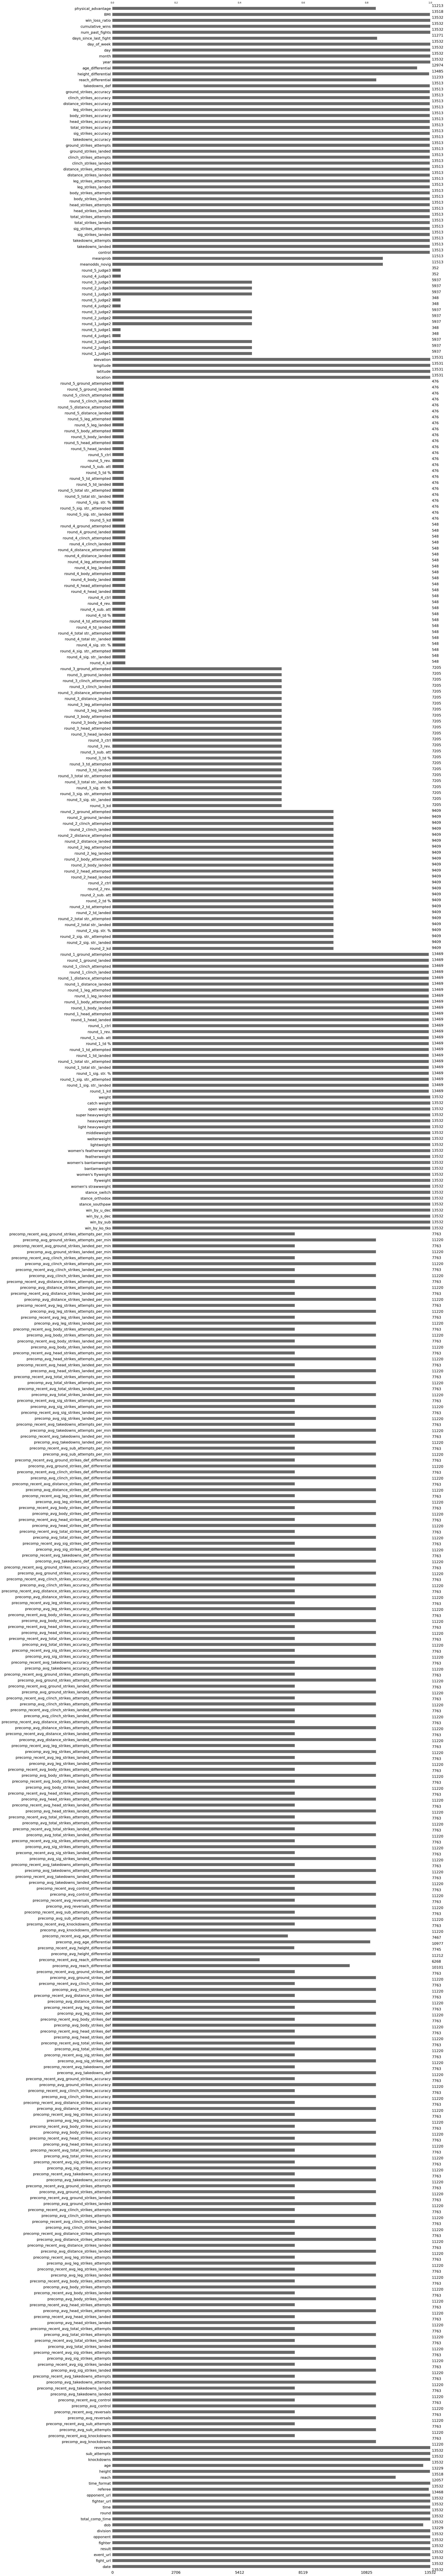

In [7]:
import missingno as msno
import matplotlib.pyplot as plt


# Visualize missingness bar chart
msno.bar(df)
plt.show()

## Running ELO

## Splitting Dataset Chronologically -- handle class imbalance!

## Identification of important features (training set only)

## Imputation for non-autogluon models

## Scaling and normalisation for non-autogluon models

## Exporting processed datasets